# 데이터 전처리
## 표준화

### 표준화 함수들
* sklearn.preprocessing 모듈의 scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x) 함수들을 이용해 표준화합니다.
    * scale(x) : 표준 정규분포를 사용해 표준화
    * robust_scale(x) : 중위수(median)와 사분위범위(interquartile range)를 사용하여 표준화
    * minmax_sacle(x) :최댓값과 최솟값을 사용하여 표준화. 0~1
    * maxabs_scale(x) :최대 절댓값을 사용하여 표준화. -1~1

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [2]:
iris_X = iris.iloc[:,:-1]
iris_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### scale()

In [3]:
from sklearn.preprocessing import scale
iris_scaled = scale(iris_X)

In [4]:
iris_scaled[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [5]:
iris_scaled.mean(axis=0)

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [6]:
for scaled_mean in iris_scaled.mean(axis=0):
    print("{:10.9f}".format(scaled_mean))

-0.000000000
-0.000000000
-0.000000000
-0.000000000


In [7]:
iris_scaled.std(axis=0)

array([1., 1., 1., 1.])

### robust_scale()

In [8]:
from sklearn.preprocessing import robust_scale
iris_robust_scaled = robust_scale(iris_X)
iris_robust_scaled[:5,:]

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333]])

### minmax_scale()

In [9]:
from sklearn.preprocessing import minmax_scale
iris_minmax_scaled = minmax_scale(iris_X)
iris_minmax_scaled[:5,:]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

### maxabs_scale()

In [10]:
from sklearn.preprocessing import maxabs_scale
iris_maxabs_scaled = maxabs_scale(iris_X)
iris_maxabs_scaled[:5,:]

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ]])

In [11]:
import numpy as np
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [12]:
minmax_scale(X)

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [13]:
maxabs_scale(X)

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

### 스케일과 스케일 백

In [14]:
import seaborn as sns
iris = sns.load_dataset("iris")

iris.iloc[:,:-1].head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
iris_scaled = sc.fit_transform(iris.iloc[:,:-1])
iris_scaled[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [16]:
iris_scaled.mean(axis=0)

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [17]:
iris_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [18]:
iris_origin = sc.inverse_transform(iris_scaled)
iris_origin[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## 인코딩(Encoding)

### 레이블 인코딩

In [19]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)

LabelEncoder()

In [21]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
species = le.transform(iris.species)
species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
le.inverse_transform(species)[:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

### 원-핫 인코딩

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
enc.fit(species.reshape(-1,1))

OneHotEncoder()

In [25]:
iris_onehot = enc.transform(species.reshape(-1,1))
iris_onehot

<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [26]:
iris_onehot.toarray()[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [27]:
import pandas as pd
pd.get_dummies(iris.species)

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


### 평균값 인코딩(Mean Encoding)

In [28]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
sex_mean = titanic.groupby("sex")["survived"].mean()
sex_mean

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [29]:
titanic['sex_mean'] = titanic['sex'].map(sex_mean) 
titanic[['sex', 'sex_mean']].head()

,sex,sex_mean
0,male,0.188908
1,female,0.742038
2,female,0.742038
3,female,0.742038
4,male,0.188908


In [30]:
titanic_pivot = titanic.pivot_table(columns="survived", 
                                    index=titanic.index, 
                                    values='sex_mean')
titanic_pivot.head()

survived,0,1
0,0.188908,NaN
1,NaN,0.742038
2,NaN,0.742038
3,NaN,0.742038
4,0.188908,NaN


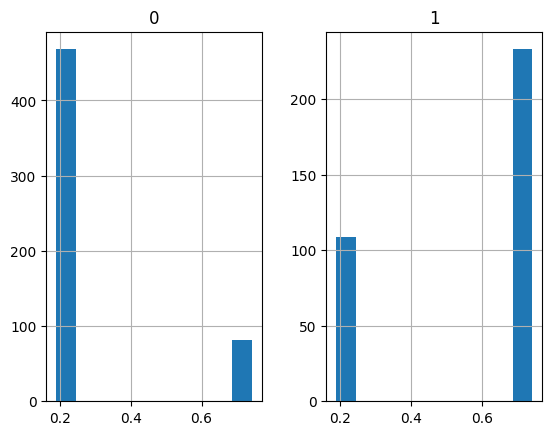

In [31]:
_ = titanic_pivot.hist(bins=10)

In [32]:
titanic['sex_n_rows'] = titanic['sex'].map(titanic.groupby('sex').size())
global_mean = titanic["survived"].mean()
alpha = 0.7
def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)
titanic['sex_mean_smoothing'] = titanic.apply(
    lambda x:smoothing(x['sex_n_rows'], x['sex_mean']), axis=1)
titanic[['sex_mean', 'sex_mean_smoothing']].head()

,sex_mean,sex_mean_smoothing
0,0.188908,0.189144
1,0.742038,0.741241
2,0.742038,0.741241
3,0.742038,0.741241
4,0.188908,0.189144


## 결측값 처리

In [33]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]

In [34]:
import random
random.seed(7902)
for col in range(4) :
    iris_X.iloc[[random.sample(range(len(iris)), 20)],col] = float('nan')

In [35]:
iris_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,3.5,NaN,0.2
1,4.9,NaN,1.4,0.2
2,4.7,3.2,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
iris_X.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### 평균으로 채우기

In [37]:
iris_X.mean(axis=0)

sepal_length    5.790000
sepal_width     3.073846
petal_length    3.749231
petal_width     1.226154
dtype: float64

In [38]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(iris_X)

SimpleImputer()

In [39]:
iris_new = imp_mean.transform(iris_X)
iris_new[:5,]

array([[5.79      , 3.5       , 3.74923077, 0.2       ],
       [4.9       , 3.07384615, 1.4       , 0.2       ],
       [4.7       , 3.2       , 3.74923077, 1.22615385],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 3.6       , 1.4       , 0.2       ]])

### 중앙값으로 채우기

In [40]:
iris_X.median(axis=0)

sepal_length    5.7
sepal_width     3.0
petal_length    4.4
petal_width     1.3
dtype: float64

In [41]:
imp_median = SimpleImputer(strategy='median')
imp_median.fit(iris_X)

SimpleImputer(strategy='median')

In [42]:
iris_median = imp_median.transform(iris_X)
iris_median[:5,]

array([[5.7, 3.5, 4.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 4.4, 1.3],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 최빈값으로 채우기

In [43]:
iris_X.mode(axis=0)

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.0,1.4,0.2
1,5.7,NaN,1.5,NaN


In [44]:
imp_mostfreq = SimpleImputer(strategy='most_frequent')
iris_mostfreq = imp_mostfreq.fit_transform(iris_X)

In [45]:
iris_mostfreq[:5, ]

array([[5. , 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# 단순 데이터 분리

## sklearn.model_selection.train_test_split()

In [46]:
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1] 

In [47]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [48]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((105, 4), (45, 4), (105,), (45,))

In [49]:
test_y.value_counts()

species
versicolor    17
virginica     15
setosa        13
Name: count, dtype: int64

### 층화추출법

In [50]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, 
                                                    test_size=0.3)
test_y.value_counts()

species
setosa        15
virginica     15
versicolor    15
Name: count, dtype: int64

# 모형 생성, 예측, 평가

## 모형 생성

In [51]:
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [52]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=1)

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

In [54]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50,50,20), max_iter=500, 
                          random_state=1)
mlp_model.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 20), max_iter=500, random_state=1)

## 예측

In [55]:
dt_model.predict(test_X)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [56]:
mlp_model.predict(test_X)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor'],
      dtype='<U10')

## 평가

In [57]:
dt_pred_y = dt_model.predict(test_X)
pd.crosstab(test_y, dt_pred_y)

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,17,1
virginica,0,1,12


In [58]:
dt_model.score(test_X, test_y)

0.9555555555555556

In [59]:
mlp_pred_y = mlp_model.predict(test_X)
pd.crosstab(test_y, mlp_pred_y)

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,18,0
virginica,0,0,13


In [60]:
mlp_model.score(test_X, test_y)

1.0